# Exercise 4 [10.0]

**_DISCLAIMER:_** The notation used in this exercise follows the one of the Probabilistic Robotics book (refer to Chapter 5.4 in case you have doubts).

## 4.1 Inverse motion model [2.0]

The odometry model uses the _relative motion information_. The odometry readings are $u_t = [{\overline{x}}_{t-1} , {\overline{x}}_{t}]$, where $\overline{x}_{t-1}$ and  $\overline{x}_t$ are poses in a robot-internal coordinate frame (different from the map).

The function `inverse_motion_model` takes as input an odometry reading $u_t$ that consist in:

- the initial pose of the robot in the odometry coordinate frame $\overline{x}_{t-1} = [\overline{x},\overline{y},\overline{\theta}]$
- the estimated pose of the robot in the odometry coordinate frame $\overline{x}_t = [\overline{x}',\overline{y}',\overline{\theta}']$

The output is the relative motion $\delta_{rot1}, \delta_{trans}, \delta_{rot2}$.

Implement the function `inverse_motion_model` and verify that it is correct for some test input. 

In [12]:
from motionmodel import *

motion = inverse_motion_model([1.2, 1.7, 2.1],  [1.3, 1.8, 2.2])
print(motion)

(-1.3146018366025518, 0.14142135623730964, 1.414601836602552)


## 4.2 Odometry-based motion model [3.0]

The function `motion_model` computes the posterior $p(x_t | u_t, x_{t-1})$ from odometry readings.

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the hypothesized (or query) final pose $x_{t} = [x', y', \theta']$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is the probability $p(x_t | u_t, x_{t-1})$

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [1.0, 1.0, 0.01, 0.01]$.

The robot excecutes one motion command and the odometry readings are:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$

Implement the `motion_model` function and verify that it is correct for some test input. **[1.0]**

---

Consider a 150x150 grid map the world with a resolution of 0.01, centered in the original position of the robot.

Plot the posterior $p(x_t | u_t, x_{t-1})$ for all possible $[x, y]$ values from the grid. **[2.0]**

**Note that** the query input is a position, not a pose. Therefore, to plot the posterior belief over the gridmap, you can assume the term $\hat{\delta}_\mathrm{rot2}$ to be zero and, for each position, integrate over all possible orientations. This can be implemented by considering $p_3 = 1.0$ in the equations. 

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grid map
size = 150
res = 0.01

alpha = [1.0, 1.0, 0.01, 0.01]
odom = [2.0, 3.0, 0.0]
prev_pose = [0.0, 0.0, 0.0]
cur_pose = [0.5, 0.0, np.pi/2]


new_pose = motion_model(cur_pose, prev_pose, odom, alpha)
print(new_pose)


0.0


## 4.3 Sample odometry motion model [2.0]

The `motion_model` requires high computation complexity and does not scale well to large real-world environments. 

One effective approach to approximate $p(x_t | u_t, x_{t-1})$ is to use **sampling**.

The `sample_motion_model` function defines the sampling-based odometry motion model. 

This function takes as input:

- the initial pose of the robot $x_{t-1} = [x,y,\theta]$ _(**map** coordinate frame)_
- the odometry readings $u_t = [\overline{x}_{t-1} \overline{x}_t]$ _(**odometry** coordinate frame)_
- the noise parameters $\mathbf{\alpha} = [\alpha_1, \alpha_2, \alpha_3, \alpha_4]$

The output is a new (sampled) pose predicted by the motion model.

Implement the `sample_motion_model` function and verify that it is correct for some test input. 

(0.7934110625679478, 2.9533288596461507, 5.190600581942528)


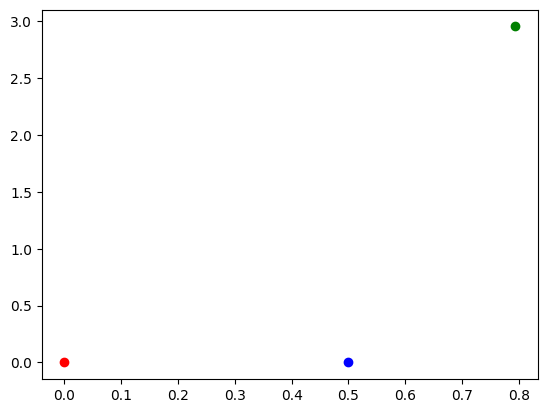

In [14]:
prev = [0.0, 0.0, 0.0]
alpha = [1.0, 1.0, 0.01, 0.01]
odom = [2.0, 3.0, 0.0]
pose = [0.5, 0.0, np.pi/2]

odom = sample_motion_model(pose, odom, alpha)
print(odom)

plt.figure()
plt.plot(prev[0], prev[1], 'ro')
plt.plot(pose[0], pose[1], 'bo')
plt.plot(odom[0], odom[1], 'go')
plt.show()



## 4.4 Evaluate sample odometry motion model  [3.0]

Assume that a robot starts at pose $x_0 = [2.0, 3.0, 0.0]$ in the map frame and moves according to a motion model with $\mathbf{\alpha} = [0.1, 0.1, 0.01, 0.01]$.

The robot obtains the following odometry readings:

1. $\overline{x}_0 = [0.0 , 0.0 , 0.0   ]$
2. $\overline{x}_1 = [0.5 , 0.0 , \pi/2 ]$
3. $\overline{x}_2 = [0.5 , 0.5 , 0.0   ]$
4. $\overline{x}_3 = [1.0 , 0.5 , 0.0   ]$
5. $\overline{x}_4 = [1.0 , 1.5 , \pi/2 ]$
6. $\overline{x}_5 = [1.0 , 2.5 , \pi/2 ]$

Evaluate the `sample_motion_model` by considering 1000 samples and plot the resulting positions for each sample in one unique plot.

In [15]:
x0 = np.array([0.0, 0.0, 0.0])
x1 = np.array([0.5, 0.0, np.pi/2])
x2 = np.array([0.5, 0.5, 0.0])
x3 = np.array([1.0,0.5, 0.0])
x4 = np.array([1.0,1.5, np.pi/2])
x5 = np.array([1.0,2.5, np.pi])

odom = [2.0, 3.0, 0.0]
alpha = [1.0, 1.0, 0.01, 0.01]



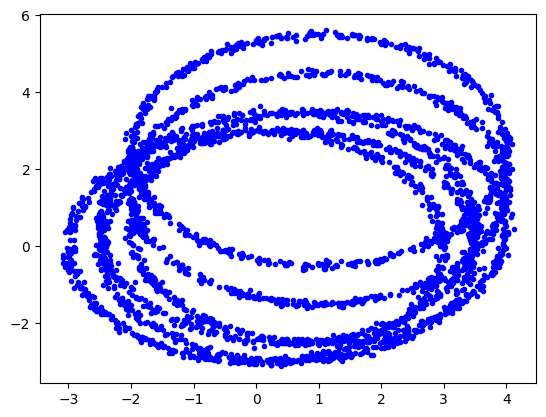

In [23]:
# use above to test the motion model with  300 samples and plot the results
samples = []
for i in range(600):
    samples.append(sample_motion_model(x0, odom, alpha))
    samples.append(sample_motion_model(x1, odom, alpha))
    samples.append(sample_motion_model(x2, odom, alpha))
    samples.append(sample_motion_model(x3, odom, alpha))
    samples.append(sample_motion_model(x4, odom, alpha))
    samples.append(sample_motion_model(x5, odom, alpha))

samples = np.array(samples)
plt.plot(samples[:,0], samples[:,1] ,'b.')
plt.show()

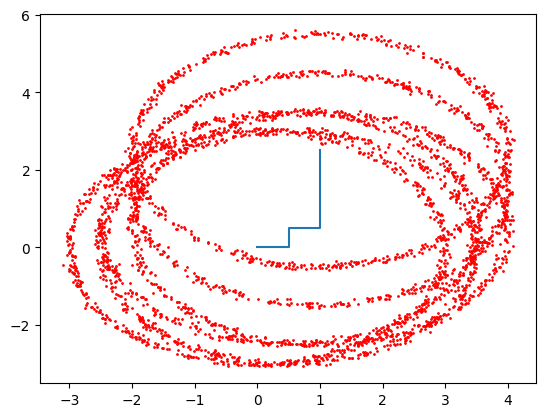

In [17]:

plt.scatter(samples[:,0], samples[:,1], s=1, c='r')
plt.plot([x0[0], x1[0], x2[0], x3[0], x4[0], x5[0]], [x0[1], x1[1], x2[1], x3[1], x4[1], x5[1]])
plt.show()

